## Installing all dependencies

In [11]:
%pip install easyocr numpy imutils matplotlib opencv-python

  Using cached opencv_python_headless-4.5.4.60-cp310-cp310-win_amd64.whl (35.0 MB)
Note: you may need to restart the kernel to use updated packages.


# Importing the dependencies

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import imutils
import easyocr
# from illumination import *

In [13]:
# img_path = r"dataset-card.jpg"           
img_path = r"white car.png"           

# Read the image

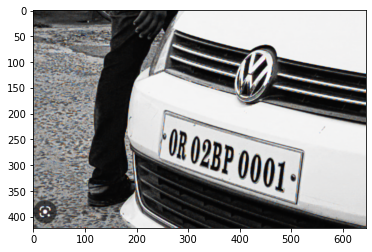

In [14]:
img = cv2.imread(img_path)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BAYER_BG2BGR))
# print(img) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BAYER_BG2BGR))

# Illumination

In [15]:
img = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)
img = cv2.edgePreservingFilter(img, flags=1, sigma_s=64, sigma_r=0.2)

# Edges detection

[[ 49  48  50 ... 243 243 243]
 [ 48  46  48 ... 243 243 243]
 [ 46  42  45 ... 243 243 243]
 ...
 [ 66  66  67 ...  28  26  24]
 [ 65  64  64 ...  65  64  60]
 [ 66  89 125 ...  64  64  64]]


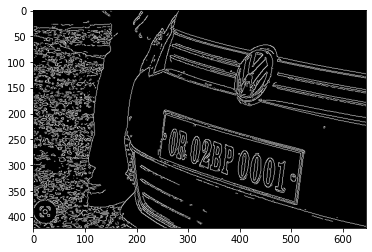

In [16]:
Filter = cv2.bilateralFilter(gray, 11, 17, 17)      # noise reduction
print(Filter)
edged = cv2.Canny(Filter, 200, 255)    # Edge Detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Find contours and apply mask.

In [17]:
keys = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(keys) 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] 

In [18]:
location = None 
for contour in contours: 
    approx = cv2.approxPolyDP(contour, 10, True) 
    if len(approx) == 4:  
        location = approx 
        break

print(location)

[[[461 286]]

 [[446 312]]

 [[453 343]]

 [[467 318]]]


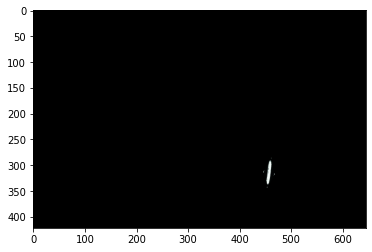

In [19]:
mask = np.zeros(gray.shape, np.uint8) 
new_img = cv2.drawContours(mask, [location], 0, 255, -1) 
new_img = cv2.bitwise_and(img, img, mask=mask) #use to findout the segment of number plate.
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))  #here we get co-ordinate on number plate is.

# Extract the number plate of the car.

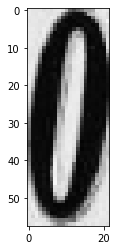

In [20]:
(x,y) = np.where(mask==255) 
(x1, y1) = (np.min(x), np.min(y)) 
(x2, y2) = (np.max(x), np.max(y)) 

cropped_img = gray[x1:x2+1, y1:y2+1]  
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

# Reading text from the extracted number plate

In [22]:
reader = easyocr.Reader(['en']) 
result = reader.readtext(cropped_img) 
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


RuntimeError: Numpy is not available

# Drawing rectangle and putting text extracted in original image

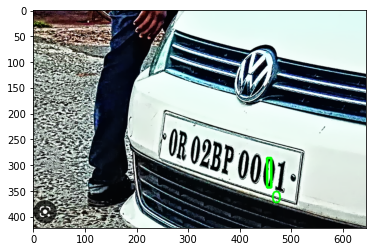

In [ ]:
text = ""
for i in result:
    text += i[-2] + " "   # we are taking the 2nd element from the last of the 2d array.
text = text.upper()
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))